<a href="https://colab.research.google.com/github/Ment1984/zarouali-ment-khoualha/blob/main/Question%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [3]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [4]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df = pd.get_dummies(df, drop_first=True)


In [7]:
X = df.drop("charges", axis=1)
y = df["charges"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))


In [11]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))


In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

ridge_preds = ridge.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))


In [15]:
print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")


Linear Regression RMSE: 5796.28
Ridge Regression RMSE: 5796.98


In [16]:
from sklearn.metrics import r2_score

lr_r2 = r2_score(y_test, lr_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

print(f"Linear Regression → R²: {lr_r2:.4f}, RMSE: {lr_rmse:.2f}")
print(f"Ridge Regression  → R²: {ridge_r2:.4f}, RMSE: {ridge_rmse:.2f}")
print(f"Lasso Regression  → R²: {lasso_r2:.4f}, RMSE: {lasso_rmse:.2f}")


Linear Regression → R²: 0.7836, RMSE: 5796.28
Ridge Regression  → R²: 0.7835, RMSE: 5796.98
Lasso Regression  → R²: 0.7836, RMSE: 5796.32


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

X_cluster = df.drop(columns=['charges'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


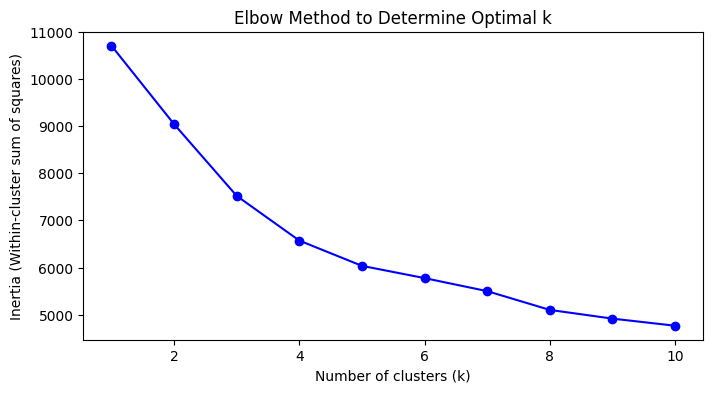

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [20]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters


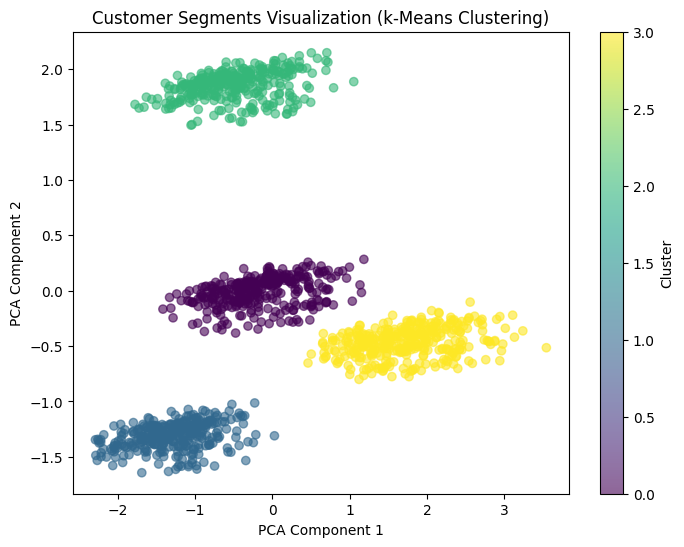

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualization (k-Means Clustering)')
plt.colorbar(label='Cluster')
plt.show()


In [22]:
print(df.groupby('cluster').mean())


               age        bmi  children       charges  sex_male  smoker_yes  \
cluster                                                                       
0        39.268519  29.173503  1.046296  13406.384516  0.503086    0.206790   
1        39.196923  29.199785  1.147692  12417.575374  0.495385    0.178462   
2        39.455385  30.596615  1.141538  12346.937377  0.501538    0.178462   
3        38.939560  33.355989  1.049451  14735.411438  0.519231    0.250000   

         region_northwest  region_southeast  region_southwest  
cluster                                                        
0                     0.0               0.0               0.0  
1                     1.0               0.0               0.0  
2                     0.0               0.0               1.0  
3                     0.0               1.0               0.0  
